In [1]:
# pip install rioxarray

In [2]:
# pip install pyproj

In [3]:
import pystac
import rioxarray
from pyproj import CRS

In [4]:
dir = "../Data/01_search.json"
items = pystac.ItemCollection.from_file(dir)
items

In [5]:
item = items[0]
assets = item.assets
print(item.assets.keys())
print(len(item.assets.keys()))

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])
35


## Exploring Raster Files

In [6]:
nir09 = assets["nir09"]
nir09.href                         ### To Download Locally with Link

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B09.tif'

In [7]:
RGB = assets["visual"]
raster_ams_RGB = rioxarray.open_rasterio(RGB.href)
# raster_ams_RGB

In [8]:
raster_ams_b9 = rioxarray.open_rasterio(nir09.href)          ## No need to download, rio is opening from the server
# raster_ams_b9

In [9]:
print(raster_ams_b9.rio.crs)                                 ## Checking the CRS

PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [10]:
print(raster_ams_b9.rio.bounds())                             ## Checking the Spatial Bounds

(600000.0, 5790240.0, 709800.0, 5900040.0)


In [11]:
print(raster_ams_b9.rio.height,raster_ams_b9.rio.width)       ## Checking height and width

1830 1830


In [12]:
raster_ams_b9.rio.shape

(1830, 1830)

In [13]:
print(raster_ams_b9.rio.nodata)                              ## No Data value checking

0


In [14]:
raster_ams_b9.values                                          ## In matrix format

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

In [15]:
# raster_ams_b9.plot()

In [16]:
# raster_ams_b9.plot(robust=True)                                    ## Enhancing the contrast automatically

In [17]:
# raster_ams_b9.plot(vmin = 100, vmax=10000)                         ## Enhancing the contrast manually 

##### Masking out the No_Data values with masked = True

In [18]:
raster_ams_b9 = rioxarray.open_rasterio(nir09.href, masked = True)          ## 
# raster_ams_b9

In [19]:
# raster_ams_b9.plot()                         ## Enhancing the contrast manually 

In [20]:
raster_ams_b9.values                      

array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)

In [21]:
print("Max", raster_ams_b9.max(), "Min", raster_ams_b9.min())

Max <xarray.DataArray ()>
array(15558.)
Coordinates:
    spatial_ref  int32 0 Min <xarray.DataArray ()>
array(1.)
Coordinates:
    spatial_ref  int32 0


### Raster Ploting

In [22]:
assets.keys()                                         ## Name of the image bands

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [23]:
visual = assets["visual"]
# raster_ams_visual = rioxarray.open_rasterio(visual.href)                                        ## Viewing the exact raster (without overview level)
raster_ams_visual = rioxarray.open_rasterio(visual.href, overview_level = 3)                      ## Overview level Downscales the raster to plot it

In [24]:
raster_ams_visual.shape

(3, 687, 687)

In [25]:
# raster_ams_visual.plot.imshow()

## Manipulating Raster CRS

In [26]:
type(raster_ams_b9.rio.crs.to_epsg)

method

In [27]:
CRS

pyproj.crs.crs.CRS

In [28]:
# epsg = raster_ams_b9.rio.crs.to_epsg
# crs = CRS(epsg)
# crs

In [29]:
# crs.name
# crs.area_of_use
# crs.axis_info 

In [30]:
raster_ams_b9.rio.width

1830

In [31]:
# raster_ams_b9[0,500:1000,500:1000].rio.to_raster("../Data/02_nir09_subset.tif")

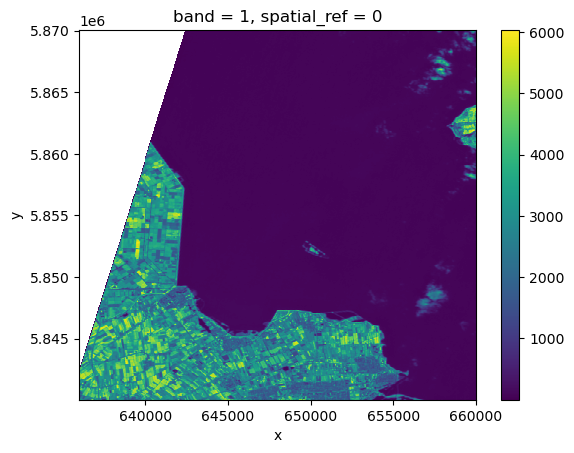

In [32]:
raster_ams_b9[0,500:1000,600:1000].plot.imshow()